# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sqlite3 import connect
import pandas as pd


In [3]:
con = connect("eser_6/output.db")
res_dir = 'NSL_SIMULATOR/OUTPUT/'
# total_energy = np.loadtxt(res_dir + 'total_energy.dat')
# magnetization = np.loadtxt(res_dir + 'magnetization.dat')


In [4]:

data_descr = pd.read_sql('SELECT * FROM SIMULAZIONI', con=con)
data_metro_no_field = data_descr.loc[(data_descr['TIPOLOGIA'] == 2) & (data_descr['EXTERNAL_FIELD'] == 0.0), 'ROWID']
data_metro_field = data_descr.loc[(data_descr['TIPOLOGIA'] == 2) & (data_descr['EXTERNAL_FIELD'] == 0.02), 'ROWID']
data_gibbs_no_field = data_descr.loc[(data_descr['TIPOLOGIA'] == 3) & (data_descr['EXTERNAL_FIELD'] == 0.0), 'ROWID']
data_gibbs_field = data_descr.loc[(data_descr['TIPOLOGIA'] == 3) & (data_descr['EXTERNAL_FIELD'] == 0.02), 'ROWID']

data_descr

,ROWID,TEMPERATURE,TIPOLOGIA,EXTERNAL_FIELD,COUPLING
0,2,0.591837,3,0.02,1.0
1,3,1.418370,3,0.02,1.0
2,4,1.663270,2,0.00,1.0
3,5,1.173470,3,0.02,1.0
4,6,1.724490,2,0.02,1.0
...,...,...,...,...,...
195,197,0.561224,3,0.00,1.0
196,198,1.510200,2,0.02,1.0
197,199,1.785710,3,0.02,1.0
198,200,1.632650,3,0.02,1.0


In [5]:
internal_energy_points = pd.read_sql('SELECT ROWID, ACTUAL_TE, TE_AVE, ERROR FROM TOTAL_ENERGY WHERE BLOCK = 20', con = con)
susceptibility_points = pd.read_sql('SELECT ROWID, ACTUAL_CHI, CHI_AVE, ERROR FROM SUSCEPTIBILITY WHERE BLOCK = 20', con = con)
specific_heat_points = pd.read_sql('SELECT ROWID, ACTUAL_CV, CV_AVE, ERROR FROM SPECIFIC_HEAT WHERE BLOCK = 20', con = con)
magnetization_points = pd.read_sql('SELECT ROWID, ACTUAL_M, M_AVE, ERROR FROM MAGNETIZATION WHERE BLOCK = 20', con = con)


In [6]:

# Filtrando in modo intelligente le cose che mi servono, perchè faticare a fare i filtri quando pandas e SQL mi mettono tutto a disposizione.
# Si è sparare sulla croce rossa con un'armata di carro armati, è divertente.
te_energy_metro = internal_energy_points.merge(data_descr, on='ROWID').loc[internal_energy_points['ROWID'].isin(data_metro_no_field), ['TEMPERATURE','ACTUAL_TE', 'TE_AVE', 'ERROR']]
te_energy_gibbs = internal_energy_points.merge(data_descr, on='ROWID').loc[internal_energy_points['ROWID'].isin(data_gibbs_no_field), ['TEMPERATURE','ACTUAL_TE', 'TE_AVE', 'ERROR']]


In [10]:

chi_metro = susceptibility_points.merge(data_descr, on='ROWID').loc[susceptibility_points['ROWID'].isin(data_metro_no_field), ['TEMPERATURE','ACTUAL_CHI', 'CHI_AVE', 'ERROR']]
chi_gibbs = susceptibility_points.merge(data_descr, on='ROWID').loc[susceptibility_points['ROWID'].isin(data_gibbs_no_field), ['TEMPERATURE','ACTUAL_CHI', 'CHI_AVE', 'ERROR']]

chi_metro.loc[(chi_metro['TEMPERATURE'] > 0.9) & (chi_metro['TEMPERATURE'] < 1.1),:]

,TEMPERATURE,ACTUAL_CHI,CHI_AVE,ERROR
12,0.989796,7.70267,7.64420,0.048236
80,1.051020,6.81607,6.45178,0.048844
107,0.928571,8.71277,9.43403,0.064871
118,1.020410,7.32989,7.09995,0.053376
131,0.959184,8.25852,8.43135,0.071040
176,1.081630,6.29414,5.96285,0.042406


In [8]:
cv_metro = specific_heat_points.merge(data_descr, on='ROWID').loc[specific_heat_points['ROWID'].isin(data_metro_no_field), ['TEMPERATURE','ACTUAL_CV', 'CV_AVE', 'ERROR']]
cv_gibbs = specific_heat_points.merge(data_descr, on='ROWID').loc[specific_heat_points['ROWID'].isin(data_gibbs_no_field), ['TEMPERATURE','ACTUAL_CV', 'CV_AVE', 'ERROR']]

In [ ]:
magn_metro = magnetization_points.merge(data_descr, on='ROWID').loc[magnetization_points['ROWID'].isin(data_metro_field), ['TEMPERATURE','ACTUAL_M', 'M_AVE', 'ERROR']]
magn_gibbs = magnetization_points.merge(data_descr, on='ROWID').loc[magnetization_points['ROWID'].isin(data_gibbs_field), ['TEMPERATURE','ACTUAL_M', 'M_AVE', 'ERROR']]


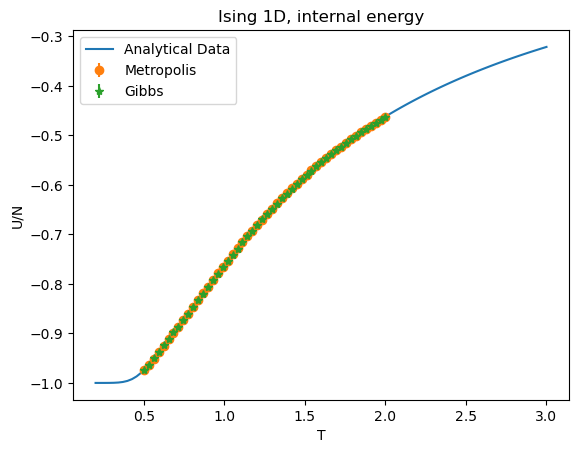

In [ ]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label='Analytical Data')
# plt.axhline(total_energy[-1,2], color = 'C1', label='Sim Res @T=1')
# plt.axvline(1., color ='k')
plt.errorbar('TEMPERATURE', 'TE_AVE', 'ERROR', data = te_energy_metro, label = 'Metropolis', linestyle = '', marker = 'o')
plt.errorbar('TEMPERATURE', 'TE_AVE', 'ERROR', data = te_energy_gibbs, label = 'Gibbs', linestyle = '', marker = '*')


plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

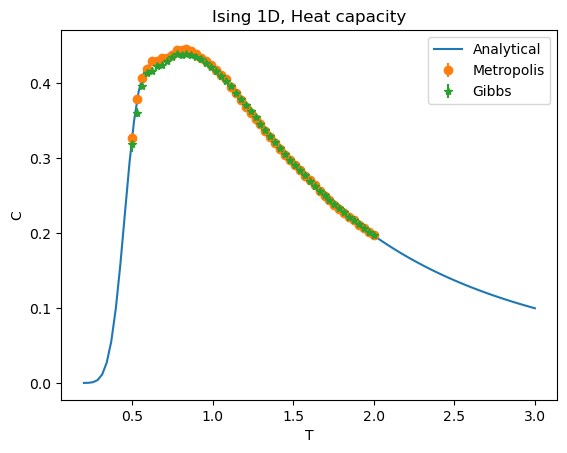

In [ ]:
heat_capacity = np.loadtxt(res_dir + 'specific_heat.dat')

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label = 'Analytical')
plt.title('Ising 1D, Heat capacity')
# plt.axhline(heat_capacity[-1, 2], color = 'C1', label = "Simulation @ T=1") # Something is wrong
# plt.axvline(1., color ='k')
plt.errorbar('TEMPERATURE', 'CV_AVE', 'ERROR', data = cv_metro, label = 'Metropolis', linestyle = '', marker = 'o')
plt.errorbar('TEMPERATURE', 'CV_AVE', 'ERROR', data = cv_gibbs, label = 'Gibbs', linestyle = '', marker = '*')


plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

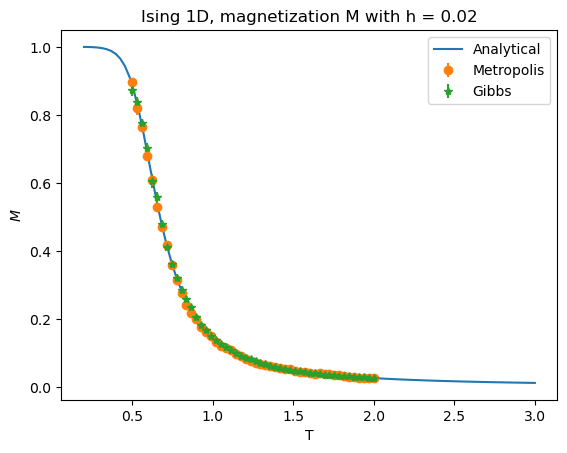

In [ ]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
    + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.plot(T, M, label = 'Analytical')
plt.errorbar('TEMPERATURE', 'M_AVE', 'ERROR', data = magn_metro, label = 'Metropolis', linestyle = '', marker = 'o')
plt.errorbar('TEMPERATURE', 'M_AVE', 'ERROR', data = magn_gibbs, label = 'Gibbs', linestyle = '', marker = '*')



# plt.axhline(magnetization[-1, 2], color = 'C1', label="magnetization @ T=1")
# plt.axvline(1., color ='k')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

Nel ```System::measure()``` mi calcolo l'energia al quadrato, in ```System::averages()``` mi calcolo la heat capacity. Ora, quello che devo fare è una cosa complicata perché il sistema in sé non è semplice da capire... Ci ragioniamo a casa come finire la cosa.

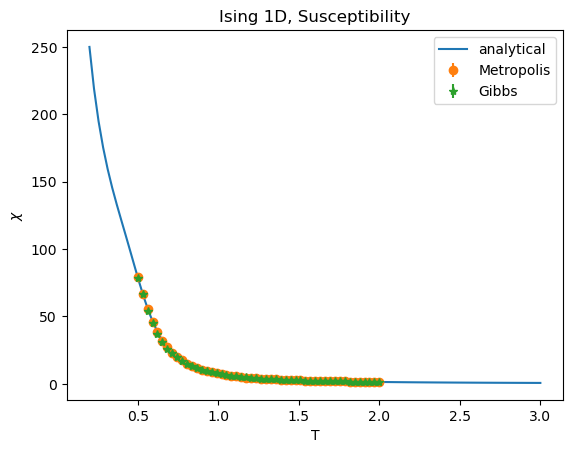

In [ ]:
# plt.axhline(susceptibility[-1, 2] , color = 'C1', label = 'Simulation @ T = 1')
# plt.axvline(1., color ='k')
# Analytical Results 
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label = 'analytical')
plt.errorbar('TEMPERATURE', 'CHI_AVE', 'ERROR', data = chi_metro, label = 'Metropolis', linestyle = '', marker = 'o')
plt.errorbar('TEMPERATURE', 'CHI_AVE', 'ERROR', data = chi_gibbs, label = 'Gibbs', linestyle = '', marker = '*')

plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.